## Problem statement (Term Deposit Sale)
### Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers who are relatively more likely to subscribe term deposit and thus increase their hit ratio.
Resources Available
The historical data for this project is available in file
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

### Deliverable – 1 (Exploratory data quality report reflecting the following) – (20)
#### 1. Univariate analysis (12 marks)
a. Univariate analysis – data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.
b. Strategies to address the different data challenges such as data pollution, outlier’s treatment and missing values treatment.
c. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots.
#### 2. Multivariate analysis (8 marks)
a. Bi-variate analysis between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes.
b. Please provide comments in jupyter notebook regarding the steps you take and insights drawn from the plots

### Deliverable – 2 (Prepare the data for analytics) – (10)
1. Ensure the attribute types are correct. If not, take appropriate actions.
2. Get the data model ready.
3. Transform the data i.e. scale / normalize if required
4. Create the training set and test set in ratio of 70:30

### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. (10 marks)
2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) (15 marks)
Proprietary content.
3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. (5 marks)

### Attribute information
#### Input variables:
#### Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account
#### Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds*
#### Other attributes:
13. campaign: number of contacts performed during this campaign and for this client
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of times the client has been contacted before for the last campaign to subscribe term deposit
16. poutcome: outcome of the previous marketing campaign
#### Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

In [1]:
# GITHUB repository: https://github.com/yogesh-singal/PGP-AIML

### Deliverable – 1 (Exploratory data quality report) – (20)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data = pd.read_csv('bank-full.csv', sep=';');

In [4]:
data.shape

(45211, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

**Insights**
- `There are no NULL values in the data`
- `The datatypes of categorical columns need to be changed to category.`

In [8]:
data.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [9]:
data['pdays'].nunique()

559

**Insights**
- `The columns balance and pdays seem to have negative values.`
- `No other numerical columns have NULLs or negative values.`

#### Change the datatype of categorical columns to category

In [10]:
data['job'] = data['job'].astype('category')
data['marital'] = data['marital'].astype('category')
data['education'] = data['education'].astype('category')
data['default'] = data['default'].astype('category')
data['housing'] = data['housing'].astype('category')
data['loan'] = data['loan'].astype('category')
data['contact'] = data['contact'].astype('category')
data['day'] = data['day'].astype('category')
data['month'] = data['month'].astype('category')
data['poutcome'] = data['poutcome'].astype('category')
#data['y'] = data['y'].astype('category')
print (data.dtypes)

age             int64
job          category
marital      category
education    category
default      category
balance         int64
housing      category
loan         category
contact      category
day          category
month        category
duration        int64
campaign        int64
pdays           int64
previous        int64
poutcome     category
y              object
dtype: object


In [11]:
data.describe()

age        balance      duration      campaign         pdays  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058    258.163080      2.763841     40.197828   
std       10.618762    3044.765829    257.527812      3.098021    100.128746   
min       18.000000   -8019.000000      0.000000      1.000000     -1.000000   
25%       33.000000      72.000000    103.000000      1.000000     -1.000000   
50%       39.000000     448.000000    180.000000      2.000000     -1.000000   
75%       48.000000    1428.000000    319.000000      3.000000     -1.000000   
max       95.000000  102127.000000   4918.000000     63.000000    871.000000   

           previous  
count  45211.000000  
mean       0.580323  
std        2.303441  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max      275.000000

#### 1. Univariate data analysis (12 marks)

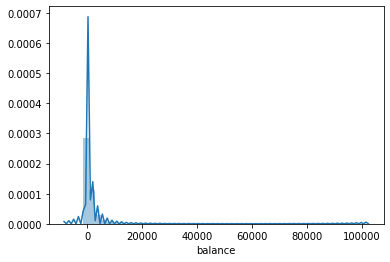

In [12]:
sns.distplot(data.balance)

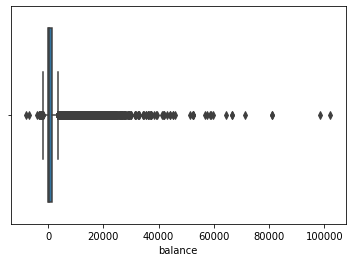

In [13]:
sns.boxplot(data.balance)

In [14]:
data[data.balance < 0].count()

age          3766
job          3766
marital      3766
education    3766
default      3766
balance      3766
housing      3766
loan         3766
contact      3766
day          3766
month        3766
duration     3766
campaign     3766
pdays        3766
previous     3766
poutcome     3766
y            3766
dtype: int64

**Insight**
- `A negative balance is not necessarily a data quality issue. It could mean an overdraft on the bank account. However we can take the absolute value and make the negative balances positive`
- `A value of -1 in pdays has a meaning. It is not a data quality issue. It makes sense to convert pdays into a categorical column`

In [15]:
data['balance']=data['balance'].abs()

In [16]:
data[data.balance < 0].count()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

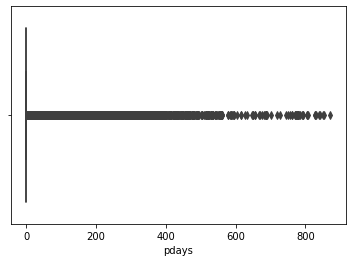

In [17]:
sns.boxplot(data.pdays)

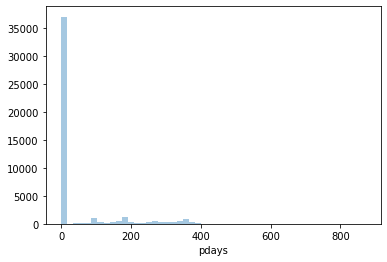

In [18]:
sns.distplot(data.pdays, kde=False)

In [19]:
data[data.pdays == -1].count()

age          36954
job          36954
marital      36954
education    36954
default      36954
balance      36954
housing      36954
loan         36954
contact      36954
day          36954
month        36954
duration     36954
campaign     36954
pdays        36954
previous     36954
poutcome     36954
y            36954
dtype: int64

**Insight**
- `More than 75% of the customers have never been contacted OR not been contacted in the last 900 days.`
- `It makes sense for pdays to be a categorical variable`

In [20]:
## Convert pdays into a categorical variable
for i, row in data.iterrows(): 
    if (row['pdays'] >=0 and row['pdays'] < 90) :
        data.at[i,'pdays'] = 1
    elif (row['pdays'] >=90 and row['pdays'] < 360) :
        data.at[i,'pdays'] = 2
    elif (row['pdays'] >=360 and row['pdays'] < 900) :
        data.at[i,'pdays'] = 3
    elif (row['pdays'] >=900 or row['pdays'] == -1) :
        data.at[i,'pdays'] = 0

In [21]:
data['pdays'].nunique()

4

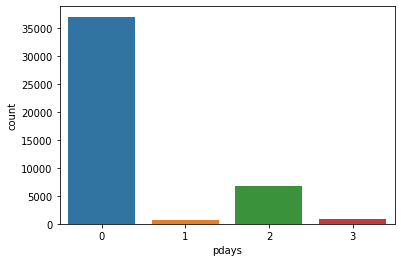

In [22]:
data['pdays'] = data['pdays'].astype('category')
sns.countplot(data.pdays)

In [23]:
data.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact day month  duration  campaign pdays  previous poutcome   y  
0  unknown   5   may       261         1     0         0  unknown  no  
1  unknown   5   may       151         1     0         0  unknown  no  
2  unknown   5   may        76         1     0         0  unknown  no  
3  unknown   5   may        92         1     0         0  unknown  no  
4  unknown   5   may       198         1     0         0  unknown  no

In [24]:
data.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      6258
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays           4
previous       41
poutcome        4
y               2
dtype: int64

In [25]:
data.describe()

age        balance      duration      campaign      previous
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000
mean      40.936210    1415.196081    258.163080      2.763841      0.580323
std       10.618762    3020.529906    257.527812      3.098021      2.303441
min       18.000000       0.000000      0.000000      1.000000      0.000000
25%       33.000000     137.000000    103.000000      1.000000      0.000000
50%       39.000000     485.000000    180.000000      2.000000      0.000000
75%       48.000000    1436.000000    319.000000      3.000000      0.000000
max       95.000000  102127.000000   4918.000000     63.000000    275.000000

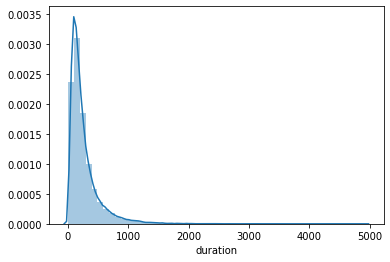

In [26]:
sns.distplot(data.duration)

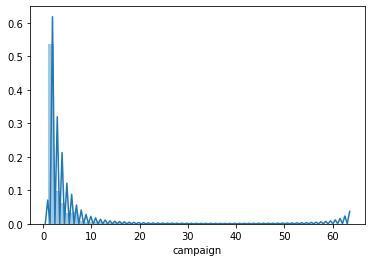

In [27]:
sns.distplot(data.campaign)

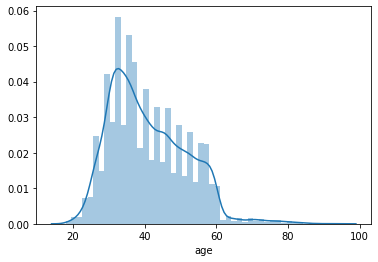

In [28]:
sns.distplot(data.age)

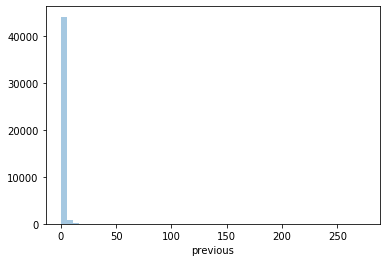

In [29]:
sns.distplot(data.previous, kde=False)

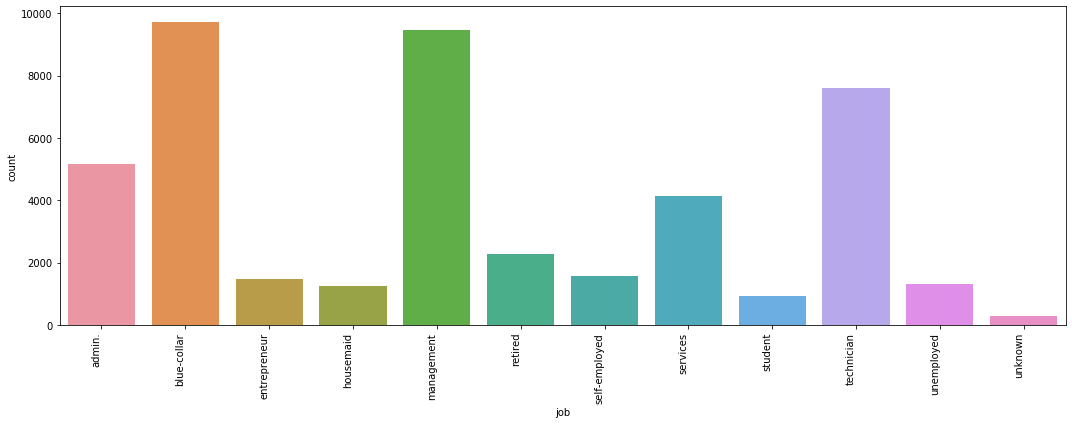

In [30]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data.job)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [31]:
df = data[['y','job']]
df.groupby(by=['job']).count().sort_values(by='y',ascending=False)

y
job                
blue-collar    9732
management     9458
technician     7597
admin.         5171
services       4154
retired        2264
self-employed  1579
entrepreneur   1487
unemployed     1303
housemaid      1240
student         938
unknown         288

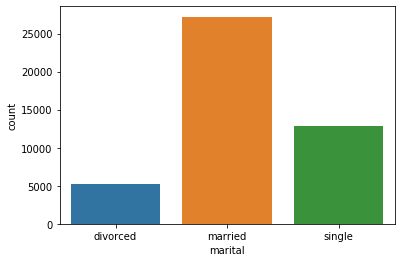

In [32]:
sns.countplot(data.marital)

In [33]:
df = data[['y','marital']]
df.groupby(by=['marital']).count().sort_values(by='y',ascending=False)

y
marital        
married   27214
single    12790
divorced   5207

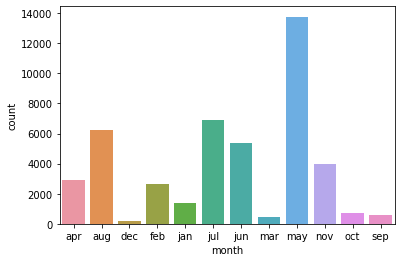

In [34]:
sns.countplot(data.month)

In [35]:
df = data[['y','month']]
df.groupby(by=['month']).count().sort_values(by='y',ascending=False)

y
month       
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214

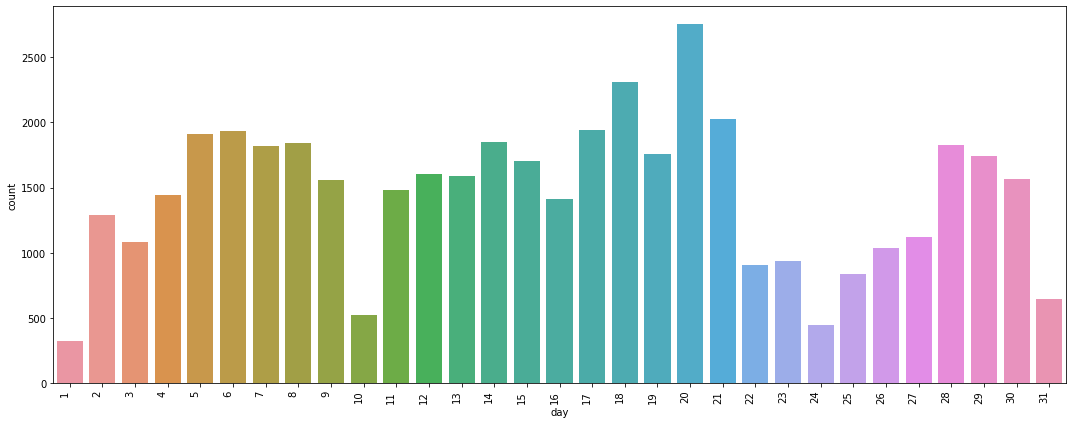

In [36]:
plt.figure(figsize=(15,6))
ax = sns.countplot(data.day)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

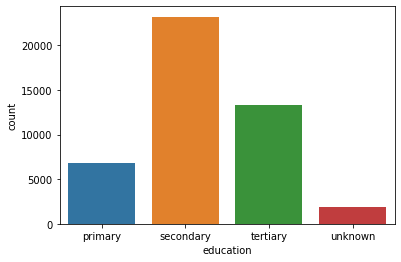

In [37]:
sns.countplot(data.education)

In [38]:
df = data[['y','education']]
df.groupby(by=['education']).count().sort_values(by='y',ascending=False)

y
education       
secondary  23202
tertiary   13301
primary     6851
unknown     1857

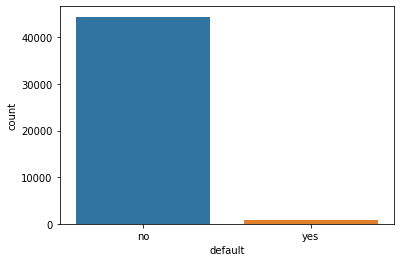

In [39]:
sns.countplot(data.default)

In [40]:
df = data[['y','default']]
df.groupby(by=['default']).count().sort_values(by='y',ascending=False)

y
default       
no       44396
yes        815

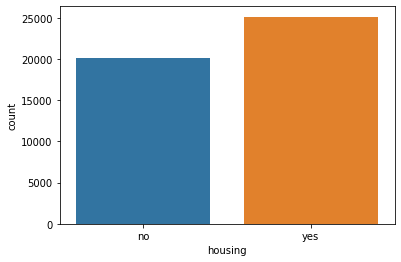

In [41]:
sns.countplot(data.housing)

In [42]:
df = data[['y','housing']]
df.groupby(by=['housing']).count().sort_values(by='y',ascending=False)

y
housing       
yes      25130
no       20081

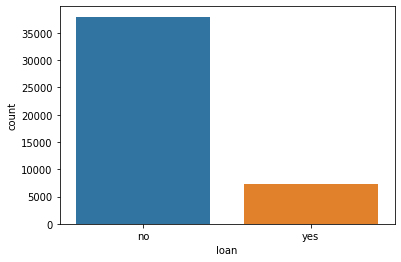

In [43]:
sns.countplot(data.loan)

In [44]:
df = data[['y','loan']]
df.groupby(by=['loan']).count().sort_values(by='y',ascending=False)

y
loan       
no    37967
yes    7244

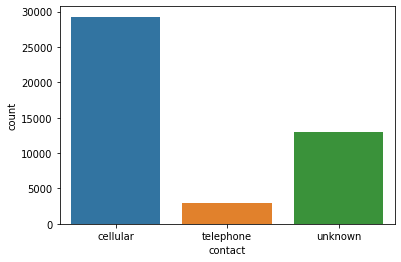

In [45]:
sns.countplot(data.contact)

In [46]:
df = data[['y','contact']]
df.groupby(by=['contact']).count().sort_values(by='y',ascending=False)

y
contact         
cellular   29285
unknown    13020
telephone   2906

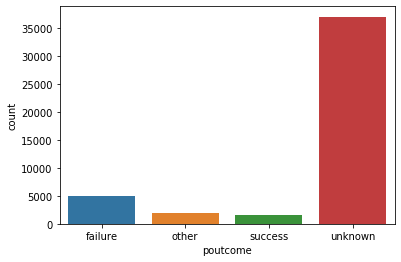

In [47]:
sns.countplot(data.poutcome)

In [48]:
df = data[['y','poutcome']]
df.groupby(by=['poutcome']).count().sort_values(by='y',ascending=False)

y
poutcome       
unknown   36959
failure    4901
other      1840
success    1511

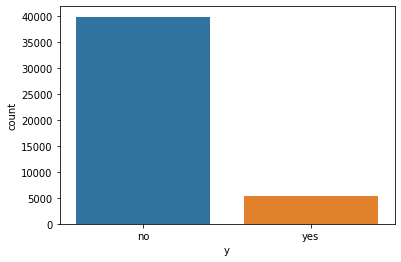

In [49]:
sns.countplot(data.y)

In [50]:
df = data[['y','loan']]
df.groupby(by=['y']).count().sort_values(by='loan',ascending=False)

loan
y         
no   39922
yes   5289

### 2. Multivariate analysis (8 marks)

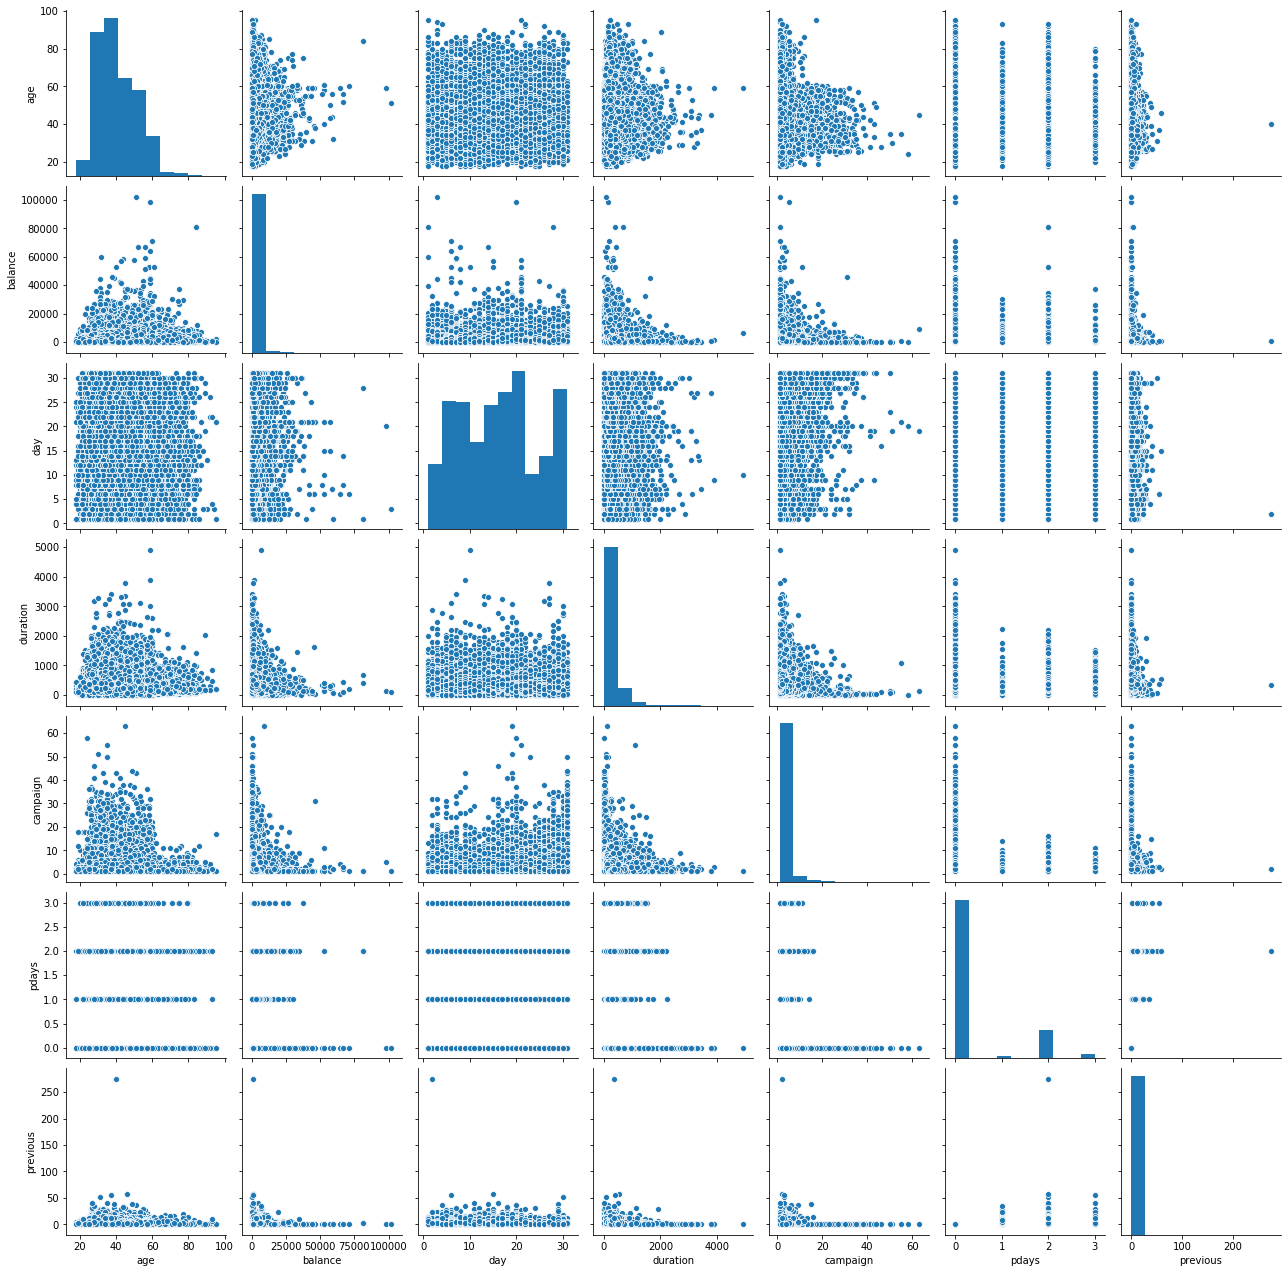

In [51]:
sns.pairplot(data)
plt.show()

In [52]:
# look at the target column 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(["y"]).mean()

age      balance    duration  campaign  previous
y                                                          
no   40.838986  1360.464130  221.182806  2.846350  0.502154
yes  41.670070  1828.319342  537.294574  2.141047  1.170354

In [53]:
# look at the target column 'Personal Loan' to understand how the data is distributed amongst the various values
data.groupby(["y"]).median()

age  balance  duration  campaign  previous
y                                              
no    39      459       164         2         0
yes   38      752       426         2         0

In [54]:
pd.crosstab(data['job'], data['y'],normalize='index')

y                    no       yes
job                              
admin.         0.877973  0.122027
blue-collar    0.927250  0.072750
entrepreneur   0.917283  0.082717
housemaid      0.912097  0.087903
management     0.862444  0.137556
retired        0.772085  0.227915
self-employed  0.881571  0.118429
services       0.911170  0.088830
student        0.713220  0.286780
technician     0.889430  0.110570
unemployed     0.844973  0.155027
unknown        0.881944  0.118056

**Insights**
- `Customers in certain occupations are more likely to subscribe to term deposits. Hence it makes sense to reduce the cardinality of the job column by assigning a value of 2 to those customers with the highest likelihood, 1 to those with a lesser likelihood and 0 to the others`

In [55]:
data = data.replace(to_replace = ['student', 'retired','unemployed', 'technician','unknown', 'self-unemployed','management', 'admin.','blue-collar', 'entrepreneur','housemaid', 'services'], value = ['2', '2','2', '1','1', '1','1', '1','0', '0','0', '0'])

In [56]:
pd.crosstab(data['marital'], data['y'],normalize='index')

y               no       yes
marital                     
divorced  0.880545  0.119455
married   0.898765  0.101235
single    0.850508  0.149492

**Insights**
- `Singles are more likely to subscribe to term deposits than divorcees, followed by married couples`

In [57]:
pd.crosstab(data['month'], data['y'],normalize='index')

y            no       yes
month                    
apr    0.803206  0.196794
aug    0.889867  0.110133
dec    0.532710  0.467290
feb    0.833522  0.166478
jan    0.898788  0.101212
jul    0.909065  0.090935
jun    0.897772  0.102228
mar    0.480084  0.519916
may    0.932805  0.067195
nov    0.898489  0.101511
oct    0.562331  0.437669
sep    0.535406  0.464594

**Insights**
- `Contacts made in particular months - dec, mar, oct & sep are more likely to subscribe to term deposits. Hence it makes sense to reduce the cardinality of the month column by assigning a value of 1 to those months and 0 to the others`

In [58]:
data = data.replace(to_replace = ['mar', 'dec','oct', 'sep','jan', 'feb','apr', 'may','jun', 'jul','aug', 'nov',], value = ['1', '1','1', '1','0', '0','0', '0','0', '0','0', '0'])

In [59]:
pd.crosstab(data['month'], data['y'],normalize='index')

y            no       yes
month                    
0      0.899336  0.100664
1      0.531873  0.468127

In [60]:
pd.crosstab(data['day'], data['y'],normalize='index')

y          no       yes
day                    
1    0.720497  0.279503
2    0.859242  0.140758
3    0.835032  0.164968
4    0.840830  0.159170
5    0.887435  0.112565
6    0.906315  0.093685
7    0.913594  0.086406
8    0.890879  0.109121
9    0.885330  0.114670
10   0.769084  0.230916
11   0.877620  0.122380
12   0.847785  0.152215
13   0.847950  0.152050
14   0.886364  0.113636
15   0.860247  0.139753
16   0.864311  0.135689
17   0.909232  0.090768
18   0.901213  0.098787
19   0.930563  0.069437
20   0.930233  0.069767
21   0.900790  0.099210
22   0.829834  0.170166
23   0.865815  0.134185
24   0.861298  0.138702
25   0.841667  0.158333
26   0.887923  0.112077
27   0.866191  0.133809
28   0.921858  0.078142
29   0.926074  0.073926
30   0.826948  0.173052
31   0.928460  0.071540

In [61]:
pd.crosstab(data['education'], data['y'],normalize='index')

y                no       yes
education                    
1          0.864297  0.135703
primary    0.913735  0.086265
secondary  0.894406  0.105594
tertiary   0.849936  0.150064

**Insights**
- `Increasing education seems to increase the chances of subscribing to the term deposit`

In [62]:
pd.crosstab(data['default'], data['y'],normalize='index')

y              no       yes
default                    
no       0.882039  0.117961
yes      0.936196  0.063804

**Insights**
- `Customers who have not defaulted are more likely to subscribe to a term deposit`

In [63]:
pd.crosstab(data['housing'], data['y'],normalize='index')

y              no       yes
housing                    
no       0.832976  0.167024
yes      0.923000  0.077000

**Insights**
- `Customers without a housing loan are more likely to subscribe to a term deposit`

In [64]:
pd.crosstab(data['loan'], data['y'],normalize='index')

y           no       yes
loan                    
no    0.873443  0.126557
yes   0.933186  0.066814

**Insights**
- `Customers without any loan are more likely to subscribe to a term deposit`

In [65]:
pd.crosstab(data['contact'], data['y'],normalize='index')

y                no       yes
contact                      
1          0.959293  0.040707
cellular   0.850811  0.149189
telephone  0.865795  0.134205

**Insights**
- `Mode of contact with customers does not seem to determine who will subscribe to a term deposit. Hence drop this column`

In [66]:
pd.crosstab(data['poutcome'], data['y'],normalize='index')

y               no       yes
poutcome                    
1         0.908385  0.091615
failure   0.873903  0.126097
other     0.833152  0.166848
success   0.352747  0.647253

**Insights**
- `Customers who subscribed to products in the previous campaign are more likely to subscribe to a term deposit`

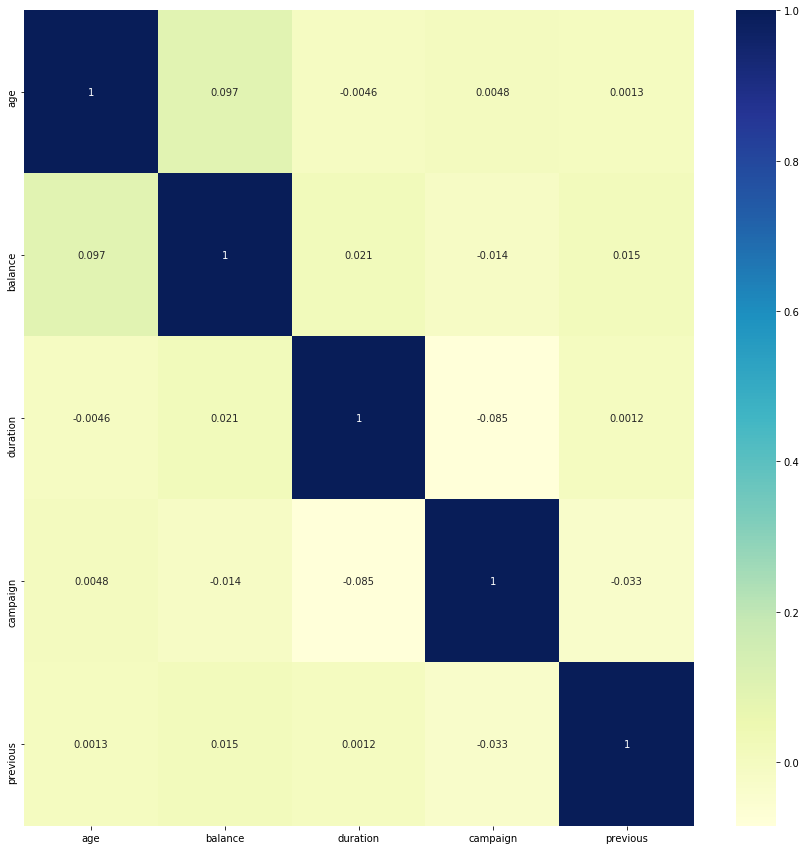

In [67]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot = True, fmt='.2g',cmap= "YlGnBu")

**Insights:**
- `None of the numerical variables are highly correlated`

### Deliverable – 2 (Prepare the data for analytics) – (10)
- Ensure the attribute types are correct. If not, take appropriate actions.
- Get the data model ready.
- Transform the data i.e. scale / normalize if required
- Create the training set and test set in ratio of 70:30

In [68]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X = data.drop(['y', 'day', 'contact'], axis=1)
X = pd.get_dummies(X, drop_first=True)
Y = data['y']   # Predicted class (yes=True, no=False)
Y = Y.replace(to_replace = ['yes', 'no'], value = ['1', '0'])
Y=pd.to_numeric(Y)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
x_train.head()
#y_train.head()

age  balance  duration  campaign  previous  job_1  job_2  \
6149    32      238       427         1         0      0      0   
12403   34      478       111         4         0      1      0   
21645   32      266       168         2         0      1      0   
29580   36       13       150         4         0      0      0   
31245   23      486        87         1         0      0      1   

       job_self-employed  marital_married  marital_single  ...  default_yes  \
6149                   0                1               0  ...            1   
12403                  0                0               1  ...            0   
21645                  0                1               0  ...            0   
29580                  0                1               0  ...            1   
31245                  0                0               1  ...            0   

       housing_yes  loan_yes  month_1  pdays_1  pdays_2  pdays_3  \
6149             1         0        0        0        0        0   
12403            1         1        0        0        0        0   
21645            1         0        0        0        0        0   
29580            0         1        0        0        0        0   
31245            0         0        1        0        0        0   

       poutcome_failure  poutcome_other  poutcome_success  
6149                  0               0                 0  
12403                 0               0                 0  
21645                 0               0                 0  
29580                 0               0                 0  
31245                 0               0                 0  

[5 rows x 23 columns]

### Deliverable – 3 (create the ensemble model) – (30)
1. First create models using Logistic Regression and Decision Tree algorithm. Note the model performance by using different matrices. Use confusion matrix to evaluate class level metrics i.e. Precision/Recall. Also reflect the accuracy and F1 score of the model. **(10 marks)**

In [69]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)

#predict on test
y_predict = model.predict(x_test)

# print the coefficients
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1        2        3         4        5         6  \
0 -0.010146  0.000019  0.00409 -0.09912  0.019009  0.19576  0.553001   

          7         8        9  ...        14       15        16        17  \
0 -0.032038 -0.309514 -0.11423  ... -0.864038 -0.46286  1.608632  0.721727   

         18        19        20        21        22  intercept  
0  0.435421  0.873984 -0.060088 -0.034062  2.110586  -2.314465  

[1 rows x 24 columns]


In [70]:
## function to get confusion matrix in a proper format
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Training accuracy 0.9007804847220906
Testing accuracy 0.9014302565614863
Confusion Matrix


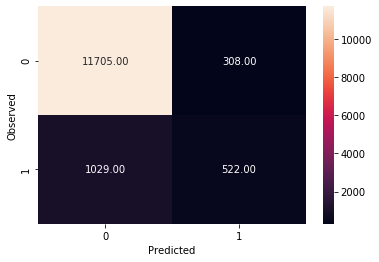

None

Recall: 0.3365570599613153
Precision: 0.6289156626506024
F1 Score: 0.4384712305753885
Roc Auc Score: 0.6554590843800583


In [71]:
print("Training accuracy",model.score(x_train,y_train))  
print("Testing accuracy",model.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:", metrics.recall_score(y_test,y_predict))
print("Precision:", metrics.precision_score(y_test,y_predict))
print("F1 Score:", metrics.f1_score(y_test,y_predict))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,y_predict))

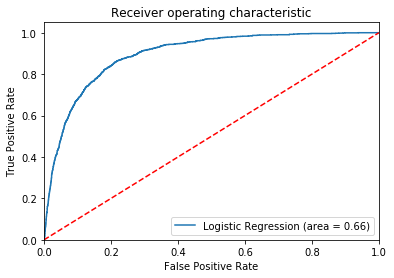

In [72]:
#AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [73]:
model_performance_metrics = pd.DataFrame (columns = ['model','test_accuracy','recall', 'precision','F1 score','ROC AUC'])

In [74]:
# Check Parameters of logistic regression and optimize them
model.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [75]:
import warnings
warnings.filterwarnings("ignore")
distributions = dict(C=uniform(loc=0, scale=4), penalty=['l2', 'l1'], solver=['liblinear', 'newton-cg','lbfgs'], max_iter=[500,1000,5000])
clf = RandomizedSearchCV(model, distributions, random_state=1)
search = clf.fit(x_train, y_train)
search.best_params_

{'C': 1.7227942687388338, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'lbfgs'}

Training accuracy is: 0.9005908932916232
Testing accuracy is: 0.9012828074314362
Confusion Matrix


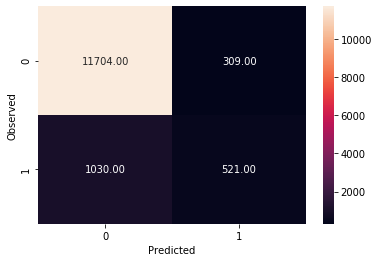

None

Recall is: 0.3359123146357189
Precision is: 0.6277108433734939
F1 Score is: 0.4376312473750525
Roc Auc Score is: 0.6550950901406347


In [76]:
#Therefore final model is
model = LogisticRegression(random_state=1,penalty='l2',solver='lbfgs',C=0.22685190926977272,max_iter=5000)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
print("Training accuracy is:",model.score(x_train,y_train))  
print("Testing accuracy is:",model.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall is:",metrics.recall_score(y_test,y_predict))
print("Precision is:",metrics.precision_score(y_test,y_predict))
print("F1 Score is:",metrics.f1_score(y_test,y_predict))
print("Roc Auc Score is:",metrics.roc_auc_score(y_test,y_predict))

In [77]:
logistic_metrics = {'model':"Logistic Regression",'test_accuracy':model.score(x_test, y_test),'recall':metrics.recall_score(y_test,y_predict), 'precision':metrics.precision_score(y_test,y_predict),'F1 score':metrics.f1_score(y_test,y_predict),'ROC AUC':metrics.roc_auc_score(y_test,y_predict)}
#append row to the dataframe
model_performance_metrics = model_performance_metrics.append(logistic_metrics, ignore_index=True)

#### Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.

In [78]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [79]:
distributions = dict(criterion=['gini','entropy'], max_depth=[10, 15, 20], min_samples_leaf=[2,4,6,10], max_features=[5,10,15], splitter=['random','best'])
clf = RandomizedSearchCV(dt_model, distributions, random_state=1)
search = clf.fit(x_train, y_train)
search.best_params_

{'splitter': 'random',
 'min_samples_leaf': 10,
 'max_features': 15,
 'max_depth': 10,
 'criterion': 'entropy'}

In [80]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf=10, max_features=15, splitter = 'random',random_state=1)
dt_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=10, max_features=15, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1, splitter='random')

In [81]:
dt_model.score(x_test , y_test)
test_pred = dt_model.predict(x_test)
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = x_train.columns))#Print the feature importance of the decision model

                          Imp
age                  0.016153
balance              0.001984
duration             0.552716
campaign             0.005043
previous             0.005002
job_1                0.004187
job_2                0.009263
job_self-employed    0.000000
marital_married      0.005000
marital_single       0.003344
education_primary    0.005236
education_secondary  0.002877
education_tertiary   0.005908
default_yes          0.000000
housing_yes          0.055598
loan_yes             0.011703
month_1              0.097755
pdays_1              0.005546
pdays_2              0.006741
pdays_3              0.000631
poutcome_failure     0.004039
poutcome_other       0.003107
poutcome_success     0.198165


Training accuracy is: 0.9071317976427465
Testing accuracy is: 0.9017988793866116
Confusion Matrix


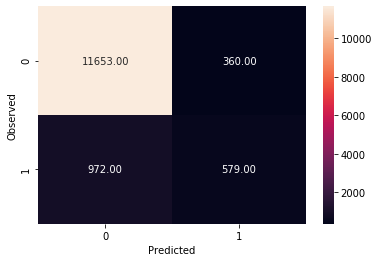

None
Recall: 0.3733075435203095
Precision: 0.6166134185303515
F1 Score: 0.46506024096385545
Roc Auc Score: 0.6716700041750386


In [82]:
print("Training accuracy is:",dt_model.score(x_train,y_train))  
print("Testing accuracy is:",dt_model.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,test_pred))
print("Recall:", metrics.recall_score(y_test,test_pred))
print("Precision:", metrics.precision_score(y_test,test_pred))
print("F1 Score:", metrics.f1_score(y_test,test_pred))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,test_pred))

**Insights**
- `Duration, successful outcome and month are the most important variables`

In [83]:
dt_metrics = {'model':"Decision Tree",'test_accuracy':dt_model.score(x_test, y_test),'recall':metrics.recall_score(y_test,test_pred), 'precision':metrics.precision_score(y_test,test_pred),'F1 score':metrics.f1_score(y_test,test_pred),'ROC AUC':metrics.roc_auc_score(y_test,test_pred)}
#append row to the dataframe
model_performance_metrics = model_performance_metrics.append(dt_metrics, ignore_index=True)
model_performance_metrics

model  test_accuracy    recall  precision  F1 score   ROC AUC
0  Logistic Regression       0.901283  0.335912   0.627711  0.437631  0.655095
1        Decision Tree       0.901799  0.373308   0.616613  0.465060  0.671670

#### 2. Build the ensemble models (Bagging and Boosting) and note the model performance by using different matrices. Use same metrics as in above model. (at least 3 algorithms) **(15 marks)**

#####  Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [84]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier()
abcl.get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [85]:
distributions = dict(base_estimator=[dt_model, None], algorithm=['SAMME', 'SAMME.R'], n_estimators=[10,50,75,100], learning_rate=[0.1,0.2,0.4,0.6,0.8,1.0])
clf = RandomizedSearchCV(abcl, distributions, random_state=1)
search = clf.fit(x_train, y_train)
search.best_params_

{'n_estimators': 50,
 'learning_rate': 0.6,
 'base_estimator': None,
 'algorithm': 'SAMME.R'}

In [86]:
abcl = AdaBoostClassifier(base_estimator=None, n_estimators=50, learning_rate=0.6, algorithm='SAMME.R', random_state=1)
abcl.fit(x_train, y_train)

test_pred = abcl.predict(x_test)
abcl.score(x_test , y_test)

0.9005455617811855

Training accuracy is: 0.9000221190002212
Testing accuracy is: 0.9005455617811855
Confusion Matrix


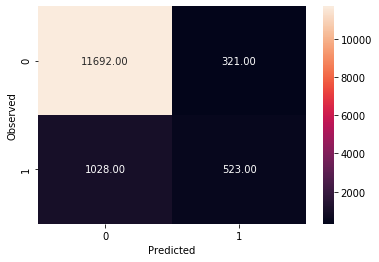

None

Recall: 0.3372018052869117
Precision: 0.6196682464454977
F1 Score: 0.4367432150313153
Roc Auc Score: 0.6552403765467273


In [87]:
print("Training accuracy is:",abcl.score(x_train,y_train))  
print("Testing accuracy is:",abcl.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,test_pred))
print()
print("Recall:", metrics.recall_score(y_test,test_pred))
print("Precision:", metrics.precision_score(y_test,test_pred))
print("F1 Score:", metrics.f1_score(y_test,test_pred))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,test_pred))

In [88]:
abcl_metrics = {'model':"AdaBoost",'test_accuracy':abcl.score(x_test, y_test),'recall':metrics.recall_score(y_test,test_pred), 'precision':metrics.precision_score(y_test,test_pred),'F1 score':metrics.f1_score(y_test,test_pred),'ROC AUC':metrics.roc_auc_score(y_test,test_pred)}
#append row to the dataframe
model_performance_metrics = model_performance_metrics.append(abcl_metrics, ignore_index=True)
model_performance_metrics

model  test_accuracy    recall  precision  F1 score   ROC AUC
0  Logistic Regression       0.901283  0.335912   0.627711  0.437631  0.655095
1        Decision Tree       0.901799  0.373308   0.616613  0.465060  0.671670
2             AdaBoost       0.900546  0.337202   0.619668  0.436743  0.655240

#### Apply Bagging Classifier Algorithm and print the accuracy.

In [89]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier()
bgcl.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [90]:
distributions = dict(base_estimator=[dt_model, None], bootstrap=[True,False], bootstrap_features=[True,False],n_estimators=[10,50,75,100], max_features=[1,2,5,10,15,20],warm_start=[True,False],oob_score=[True,False],max_samples=[100,200,500,10000,10000,20000])
clf = RandomizedSearchCV(bgcl, distributions, random_state=1)
search = clf.fit(x_train, y_train)
search.best_params_

{'warm_start': False,
 'oob_score': False,
 'n_estimators': 75,
 'max_samples': 10000,
 'max_features': 15,
 'bootstrap_features': True,
 'bootstrap': True,
 'base_estimator': None}

In [91]:
bgcl = BaggingClassifier(base_estimator=None,bootstrap_features=True,n_estimators=75, max_features=15,oob_score=False,max_samples=10000, random_state=1)
bgcl.fit(x_train, y_train)
test_pred = bgcl.predict(x_test)
bgcl.score(x_test , y_test)

0.8960483633146564

Training accuracy is: 0.9137990962808481
Testing accuracy is: 0.8960483633146564
Confusion Matrix


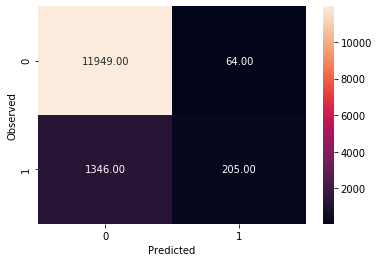

None

Recall: 0.13217279174725982
Precision: 0.7620817843866171
F1 Score: 0.22527472527472525
Roc Auc Score: 0.5634226149696093


In [92]:
print("Training accuracy is:",bgcl.score(x_train,y_train))  
print("Testing accuracy is:",bgcl.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,test_pred))
print()
print("Recall:", metrics.recall_score(y_test,test_pred))
print("Precision:", metrics.precision_score(y_test,test_pred))
print("F1 Score:", metrics.f1_score(y_test,test_pred))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,test_pred))

In [93]:
bgcl_metrics = {'model':"Bagging",'test_accuracy':bgcl.score(x_test, y_test),'recall':metrics.recall_score(y_test,test_pred), 'precision':metrics.precision_score(y_test,test_pred),'F1 score':metrics.f1_score(y_test,test_pred),'ROC AUC':metrics.roc_auc_score(y_test,test_pred)}
#append row to the dataframe
model_performance_metrics = model_performance_metrics.append(bgcl_metrics, ignore_index=True)
#model_performance_metrics.drop([2],inplace = True)
model_performance_metrics

model  test_accuracy    recall  precision  F1 score   ROC AUC
0  Logistic Regression       0.901283  0.335912   0.627711  0.437631  0.655095
1        Decision Tree       0.901799  0.373308   0.616613  0.465060  0.671670
2             AdaBoost       0.900546  0.337202   0.619668  0.436743  0.655240
3              Bagging       0.896048  0.132173   0.762082  0.225275  0.563423

#### Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier()
gbcl.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [95]:
#distributions = dict( criterion=['friedman_mse', 'mse', 'mae'],max_depth=[10, 15, 20], min_samples_leaf=[2,4,6,10], n_estimators=[50,75,100],warm_start=[True,False],max_features=[5,10,15], learning_rate = [0.05, 0.2, 0.5])
distributions = dict(max_depth=[10, 15], min_samples_leaf=[10], n_estimators=[50,100],max_features=[10,15], learning_rate = [0.05, 0.2, 0.5])
clf = RandomizedSearchCV(gbcl, distributions, random_state=1)
search = clf.fit(x_train, y_train)
search.best_params_

{'n_estimators': 100,
 'min_samples_leaf': 10,
 'max_features': 15,
 'max_depth': 10,
 'learning_rate': 0.05}

In [100]:
gbcl = GradientBoostingClassifier(max_depth=10, min_samples_leaf=10, n_estimators=100, learning_rate = 0.05 , max_features=15, random_state=1)
gbcl = gbcl.fit(x_train, y_train)
test_pred = gbcl.predict(x_test)
gbcl.score(x_test , y_test)

0.9031259215570628

Training accuracy is: 0.9531077195310772
Testing accuracy is: 0.9031259215570628
Confusion Matrix


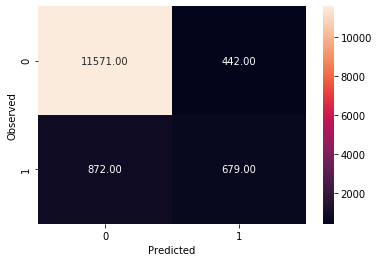

None

Recall: 0.4377820760799484
Precision: 0.6057091882247992
F1 Score: 0.5082335329341316
Roc Auc Score: 0.7004943011715817


In [101]:
print("Training accuracy is:",gbcl.score(x_train,y_train))  
print("Testing accuracy is:",gbcl.score(x_test, y_test))
print('Confusion Matrix')
print(draw_cm(y_test,test_pred))
print()
print("Recall:", metrics.recall_score(y_test,test_pred))
print("Precision:", metrics.precision_score(y_test,test_pred))
print("F1 Score:", metrics.f1_score(y_test,test_pred))
print("Roc Auc Score:", metrics.roc_auc_score(y_test,test_pred))

In [102]:
gbcl_metrics = {'model':"GradientBoost",'test_accuracy':gbcl.score(x_test, y_test),'recall':metrics.recall_score(y_test,test_pred), 'precision':metrics.precision_score(y_test,test_pred),'F1 score':metrics.f1_score(y_test,test_pred),'ROC AUC':metrics.roc_auc_score(y_test,test_pred)}
#append row to the dataframe
#model_performance_metrics.drop([4],inplace = True)
model_performance_metrics = model_performance_metrics.append(gbcl_metrics, ignore_index=True)
model_performance_metrics

model  test_accuracy    recall  precision  F1 score   ROC AUC
0  Logistic Regression       0.901283  0.335912   0.627711  0.437631  0.655095
1        Decision Tree       0.901799  0.373308   0.616613  0.465060  0.671670
2             AdaBoost       0.900546  0.337202   0.619668  0.436743  0.655240
3              Bagging       0.896048  0.132173   0.762082  0.225275  0.563423
4        GradientBoost       0.903126  0.437782   0.605709  0.508234  0.700494

#### 3. Make a DataFrame to compare models and their metrics. Give conclusion regarding the best algorithm and your reason behind it. **(5 marks)**

In [103]:
model_performance_metrics

model  test_accuracy    recall  precision  F1 score   ROC AUC
0  Logistic Regression       0.901283  0.335912   0.627711  0.437631  0.655095
1        Decision Tree       0.901799  0.373308   0.616613  0.465060  0.671670
2             AdaBoost       0.900546  0.337202   0.619668  0.436743  0.655240
3              Bagging       0.896048  0.132173   0.762082  0.225275  0.563423
4        GradientBoost       0.903126  0.437782   0.605709  0.508234  0.700494

#### CONCLUSION

`Confusion matrix means`

*True Positive (observed=1,predicted=1):*
Predicted that customer will subscribe to Term Deposit and the customer did indeed subscribe to the Term Deposit

*False Positive (observed=0,predicted=1):*
Predicted that customer will subscribe to Term Deposit but the customer did not subscribe to the Term Deposit

*True Negative (observed=0,predicted=0):*
Predicted that customer will not subscribe to Term Deposit and the customer did not subscribe to the Term Deposit

*False Negative (observed=1,predicted=0):*
Predicted that customer will not subscribe to Term Deposit but the customer did subscribe to the Term Deposit

The bank wants to offer Term Deposit to customers based on previously collected statistics i.e. **high True Positive rate and high True Negative rate**, if TP & TN are high, the bank's campaign will be deemed successful. Hence **Accuracy & Precision are the important metrics** here.

In case of False negative bank will lose a few customers but that is okay as long as the True Negative rate is high. Identifying the customers who are not likely to subscribe to the Term Deposit offer will eliminate wasteful marketing spend. Recall is an important metric but even after repeated analysis, dropping columns, reducing the cardinality of categorical variables and optimizing the parameters, it was found that it was not possible to get a Recall rate much above 42%. 

**The best algorithm was found to be the GRADIENT BOOST algorithm because it had the highest accuracy, Recall, F1 score and ROC AUC among all the models tested. Also, its precision was the third highest among all the models**